# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [1]:
import zipfile
import pandas as pd
import os

with zipfile.ZipFile(os.path.join('tm10007_ml','ecg','ecg_data.zip'), 'r') as zip_ref:
    zip_ref.extractall('/content/tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

FileNotFoundError: [Errno 2] No such file or directory: 'tm10007_ml\\ecg\\ecg_data.zip'

In [10]:
# General packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
from sklearn import model_selection

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV, SelectKBest, SelectFdr, chi2, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [11]:
labels = data.iloc[:,-1]
x = data.iloc[:,:-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, labels, test_size=0.25, stratify=labels, random_state=42)
print(X_test.shape)
print(X_train.shape)

(207, 9000)
(620, 9000)


In [12]:
pipe = Pipeline([('feature_selection', SelectKBest(f_classif)), 
                 ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, max_features='sqrt'))
                 ])

param_grid = {
    'feature_selection__k': [300, 400, 500],
    'classifier__n_estimators': [30, 40, 50],
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__bootstrap': [True, False]
}

grid_search = model_selection.GridSearchCV(
                                            pipe, 
                                            param_grid=param_grid, 
                                            cv=model_selection.StratifiedKFold(n_splits=4), 
                                            scoring='roc_auc', 
                                            n_jobs=-1
                                            )
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

KeyboardInterrupt: 

SVM

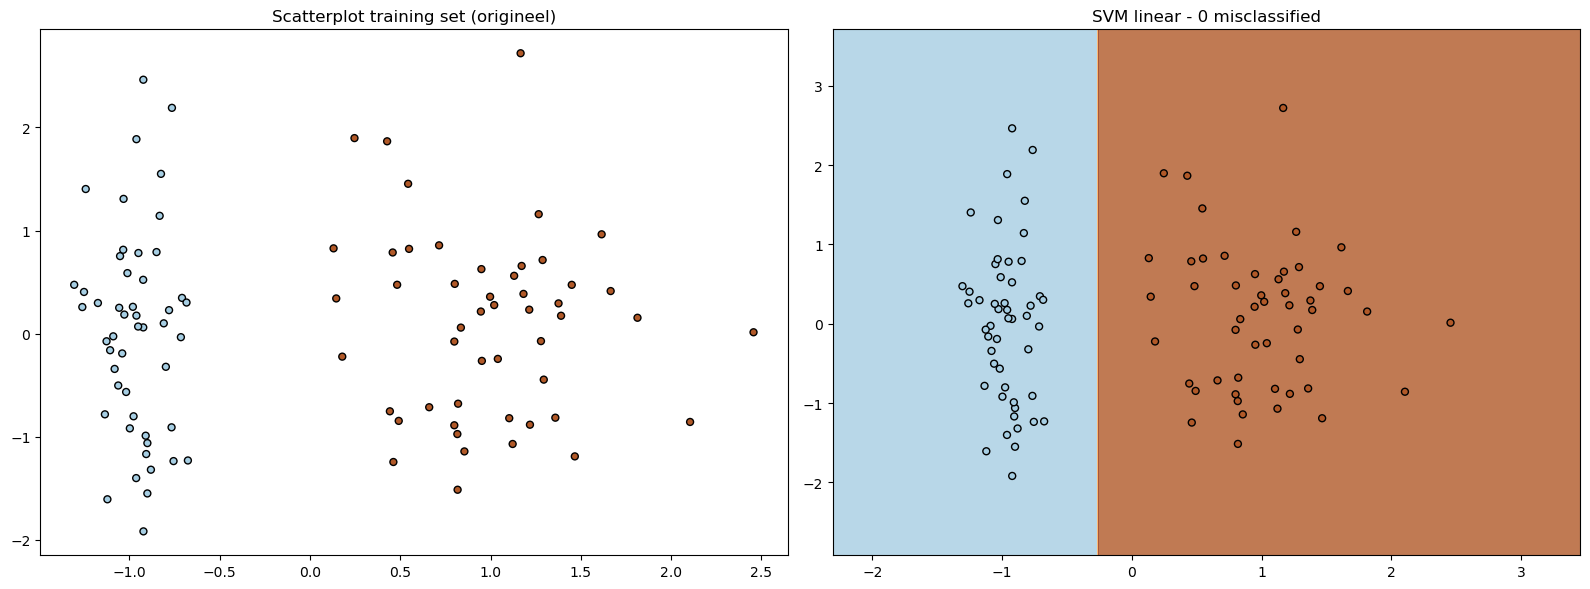

In [24]:
#SVM
pipe = Pipeline([('scaler', StandardScaler()),
                 ('feature_selection', RFECV(SVC(kernel='linear', gamma='scale'), step=1, cv=5)),
                 ('classifier', SVC(kernel='linear', gamma='scale'))
                    ])

#trainingsdata (met waardes zoals in exercises)
X_train, Y_train = ds.make_classification(n_samples=100, n_features=2, n_redundant=0,
                                          n_informative=1, n_clusters_per_class=1, random_state=42)

#plot without classifiers
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Scatterplot training set (origineel)")
ax1.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train,
            s=25, edgecolor='k', cmap=plt.cm.Paired)

#plot with classifier
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_train)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Na pipeline (met classifier)")

# Create a mesh to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                np.arange(y_min, y_max, 0.01))

Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
ax2.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Scatter plot with predictions
ax2.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_pred,
         s=25, edgecolor='k', cmap=plt.cm.Paired)

misclassified = (Y_train != Y_pred).sum()
ax2.set_title(f"SVM linear - {misclassified} misclassified")

plt.tight_layout()
plt.show()

